In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/moshida/EUVlitho


In [2]:
import numpy as np
from elitho import diffraction_amplitude, const, descriptors, diffraction_order

dod_narrow = descriptors.DiffractionOrderDescriptor(1.5)
dod_wide = descriptors.DiffractionOrderDescriptor(6.0)
doc_narrow = diffraction_order.DiffractionOrderCoordinate(
        dod_narrow.max_diffraction_order_x,
        dod_narrow.max_diffraction_order_y,
        diffraction_order.ellipse,
)
doc_wide = diffraction_order.DiffractionOrderCoordinate(
        dod_wide.max_diffraction_order_x,
        dod_wide.max_diffraction_order_y,
        diffraction_order.rounded_diamond,
)

/home/moshida/.pyenv/versions/3.12.11/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from elitho.pupil import PupilCoordinates
pupil_coords = PupilCoordinates(doc_wide.num_valid_diffraction_orders)
pupil_coords.n_coordinates, np.sum(pupil_coords.xinput >= 8)


(333, np.int64(241))

In [4]:
abxx, vcxx = diffraction_amplitude.absorber_and_vacuum_amplitudes(const.PolarizationDirection.X, dod_wide, doc_narrow)

In [5]:
import numpy as np

with open("assets/masks/mask.bin", "rb") as f:
    packed = np.frombuffer(f.read(), dtype=np.uint8)
unpacked = np.unpackbits(packed)
mask = unpacked.reshape((2048, 2048))

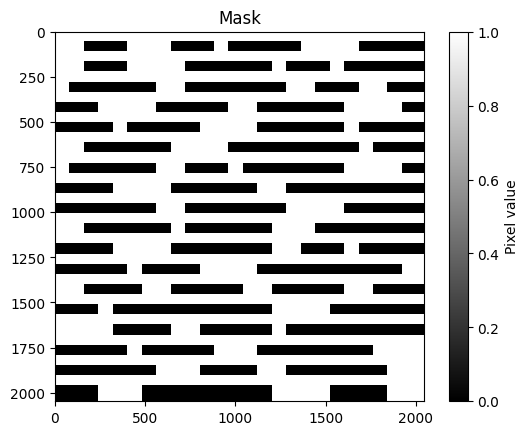

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(mask, cmap='gray', interpolation='nearest')
plt.title("Mask")
plt.colorbar(label="Pixel value")
plt.show()

In [8]:
dampxx = diffraction_amplitude.compute_diffraction_difference(const.PolarizationDirection.X, mask, abxx, vcxx, dod_wide, doc_wide)

In [16]:
from elitho import m3d
from elitho.utils import saver
a0xx, axxx, ayxx = m3d.m3d_params(pupil_coords, dampxx)
file_path = "assets/params/m3d.npz"
saver.save_m3d_params(file_path, a0xx, axxx, ayxx)

In [ ]:
# d0 = np.zeros(pupil_coords.n_coordinates, dtype=np.complex128)
# dx = np.zeros_like(d0)
# dy = np.zeros_like(d0)

# for n in range(pupil_coords.n_coordinates):
#     ip = pupil_coords.linput[n] + const.lpmaxX
#     jp = pupil_coords.minput[n] + const.lpmaxY
#     d0[n] = a0xx[ip, jp]
#     dx[n] = axxx[ip, jp]
#     dy[n] = ayxx[ip, jp]
    

In [19]:
from elitho import m3d

a0xx, axxx, ayxx = m3d.m3d_from_mask(mask)

In [ ]:
# # 一度今あるやつと一緒かどうか確認

# params = np.load(file_path)
# ref_d0, ref_dx, ref_dy = params["d0"], params["dx"], params["dy"]

In [ ]:
# np.all(d0 == ref_d0), np.all(dx == ref_dx), np.all(dy == ref_dy)

(np.True_, np.True_, np.True_)

In [ ]:
# params = np.load(file_path)
# d0, dx, dy = params["d0"], params["dx"], params["dy"]
# ref_a0xx = np.zeros((const.noutX, const.noutY), dtype=np.complex128)
# ref_axxx = np.zeros_like(ref_a0xx)
# ref_ayxx = np.zeros_like(ref_a0xx)
# for n in range(pupil_coords.n_coordinates):
#     ip = pupil_coords.linput[n] + const.lpmaxX
#     jp = pupil_coords.minput[n] + const.lpmaxY
#     ref_a0xx[ip, jp] = d0[n]
#     if pupil_coords.xinput[n] >= 8:
#         ref_axxx[ip, jp] = dx[n]
#         ref_ayxx[ip, jp] = dy[n]

In [ ]:
# np.all(a0xx==ref_a0xx), np.all(axxx==ref_axxx), np.all(ayxx==ref_ayxx)

(np.True_, np.True_, np.True_)